# Homework 4: Optimization

### Bayu Wilson - ASTR 427 - Due Wednesday, May 23 2018

# 1) Golden Search

Write a program to find the minimum of a function of one variable
using the Golden Search method.
Write your code in a flexible manner so that you can use it later for
other problems, and choose your stopping criteria carefully

In [34]:
import matplotlib.pyplot as plt, numpy as np

In [35]:
golden_ratio = (math.sqrt(5) + 1) / 2

def golden_search(f, a, b, tol=1e-5):
    """
    Function searches for minimum of function on interval from [a,b] using golden search method. 
    Reference -> https://en.wikipedia.org/wiki/Golden-section_search 
    
    f: input function that you're optimizing
    a: minimum of range containing minima 
    b: maximum of range containing minima 
    tol: The minimum acceptable difference between the new interval to avoid roundoff error.
    """
    c = b - (b - a) / golden_ratio
    d = a + (b - a) / golden_ratio 
    while abs(c - d) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c

        # we recompute both c and d here to avoid loss of precision which may lead to incorrect results or infinite loop
        c = b - (b - a) / golden_ratio
        d = a + (b - a) / golden_ratio

    return (b + a) / 2

# 2)

The rotation curves (that is, rotation velocity vs. distance from the
center) for galaxies are observed to rise linearly close to the center, and
to be constant far from the center. A possible function which can be
fit to such a rotation curve is:

### $$ v_{model}(r) = v_{inf} (1-e^{-r/r_0}), $$

where $v_{inf}$ is the assympotic velocity and $r_0$ is a characteristic radius.
Using the Golden Search method, and assuming that $v_{inf}$ is $100 km/s$,
find the $r_0$ that gives the best fit of the above formula to the following
“data”:

http://faculty.washington.edu/trq/astr427/rot.dat.

As a criteria
for goodness of fit, use the standard least squares formulae:

### $$ E = \sum_{i=1}^{N_{data}}(v_{obs} - v_{model}(r_{obs}))^2 $$

That is, the observational error is the same for each data point.

In [106]:
# Load in data
r_obs,v_obs = np.loadtxt("rot.dat").T # radius in kpc, velocity in km/s
v_inf = 100 #km/s

# define functions
def find_vmodel(r,r0):
    return v_inf*(1-np.exp(-r/r0))
def find_least_squares(v_obs,r_obs):
    f = (lambda r0: np.sum((v_obs-find_vmodel(r_obs,r0))**2))
    return golden_search(f,-5,5)
    
best_r0 = find_least_squares(v_obs,r_obs)

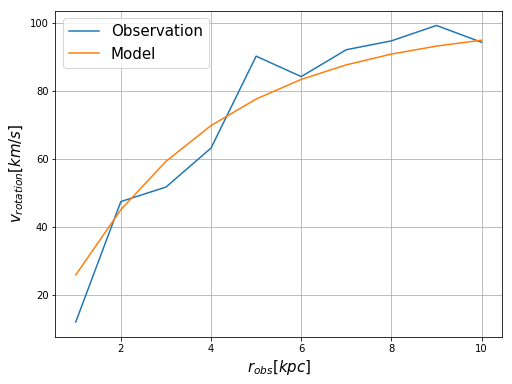

In [119]:
# Visualize data
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(r_obs,v_obs, label='Observation')
plt.plot(r_obs,find_vmodel(r_obs,best_r0), label='Model')
#plt.plot(r_obs,find_vmodel(r_obs,2))
plt.xlabel(r'$r_{obs} [kpc] $', fontsize = 15)
plt.ylabel(r'$v_{rotation} [km/s] $', fontsize = 15)
plt.legend(loc='best', fontsize = 15)
plt.show()

In [104]:
#plt.plot(np.linspace(-5,5,10),f(np.linspace(-5,5,10)))
#f(np.linspace(-5,5,10))

# 3)
Now relax the constraint on vinf and use a package (I recommend
scipy.optimize.minimize with the “Powell” methdod) to fit the above
data for both $r_0$ and $v_{inf}$.
Note that the above data were generated from a model with $r_0 = 3$,
$v_{inf} = 100$ and an error with standard deviation of $10$. Comment on
the differences between your results and the model values.

In [135]:
import scipy
f = (lambda r0: np.sum((v_obs-find_vmodel(r_obs,r0))**2))
soln_dict = scipy.optimize.minimize(f,3,tol=1e-5,method='Powell')
r_0_scipy = float(soln_dict.x)

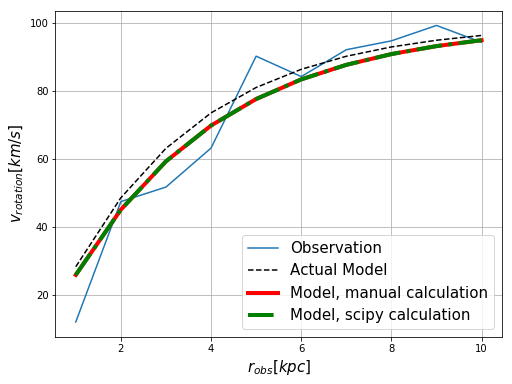

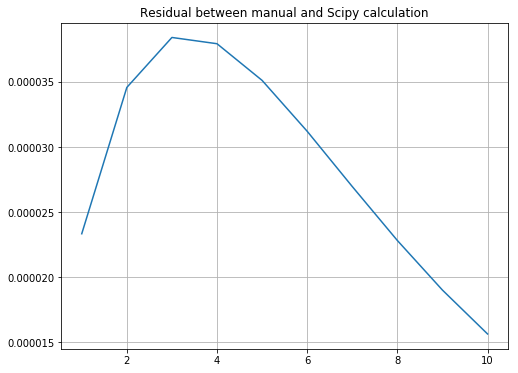

In [166]:
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(r_obs,v_obs, label='Observation')
plt.plot(r_obs,find_vmodel(r_obs,3), linestyle='--',color='black', label='Actual Model')
plt.plot(r_obs,find_vmodel(r_obs,best_r0), lw = 4,color = 'red', 
         label='Model, manual calculation')
plt.plot(r_obs,find_vmodel(r_obs,r_0_scipy), lw=4,color = 'green',
         linestyle='-.', label='Model, scipy calculation')

#plt.plot(r_obs,find_vmodel(r_obs,2))
plt.xlabel(r'$r_{obs} [kpc] $', fontsize = 15)
plt.ylabel(r'$v_{rotation} [km/s] $', fontsize = 15)
plt.legend(loc='best', fontsize = 15)
plt.show()

# Residual between manual and scipy calc
plt.figure(figsize=(8,6))
plt.title("Residual between manual and Scipy calculation")
plt.grid()
plt.plot(r_obs,np.abs(find_vmodel(r_obs,best_r0)-find_vmodel(r_obs,r_0_scipy)))
plt.show()


In [169]:
difference_between_r0 = np.abs(r_0_scipy - best_r0)
print("The difference between r_0 values are very small " 
      "({0:.3e}) and residual plot shows that models match very well.".format(difference_between_r0))

The difference between r_0 values are very small (3.496e-06) and residual plot shows that models match very well.
